<a href="https://colab.research.google.com/github/JeebakZ/Online-Retail-II-Dataset-EDA/blob/main/Online_Retail_II_Data_Set_EDA_by_Jeebak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##  Load the Dataset:

In [5]:
import pandas as pd

data = pd.read_csv("/online_retail_II.csv", encoding='latin1', error_bad_lines=False)

<ipython-input-5-c514c7024025>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("/online_retail_II.csv", encoding='latin1', error_bad_lines=False)
Skipping line 37006: expected 8 fields, saw 14

<ipython-input-5-c514c7024025>:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/online_retail_II.csv", encoding='latin1', error_bad_lines=False)


## Explore the Dataset:

In [6]:
# Display the first few rows of the dataset
print(data.head())

# Check the data types and null values
print(data.info())

# Summary statistics
print(data.describe())


  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1  536365     71053                  WHITE METAL LANTERN       6.0   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

        InvoiceDate  Price Customer ID         Country  
0  01-12-2010 08:26   2.55       17850  United Kingdom  
1  01-12-2010 08:26   3.39       17850  United Kingdom  
2  01-12-2010 08:26   2.75       17850  United Kingdom  
3  01-12-2010 08:26   3.39       17850  United Kingdom  
4  01-12-2010 08:26   3.39       17850  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554193 entries, 0 to 554192
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      554193 non-null  object

## Data Cleaning and Preprocessing:

### Handling Missing Values:

In [7]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values
data.dropna(inplace=True)  # Drop rows with missing values


Invoice             0
StockCode           0
Description      1461
Quantity            2
InvoiceDate         2
Price               2
Customer ID    139029
Country             3
dtype: int64


### Convert Data Types:

In [9]:
# Convert 'InvoiceDate' column to datetime object
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

### Remove Duplicates:

In [10]:
# Check for duplicates
print("Number of duplicate rows:", data.duplicated().sum())

# Remove duplicates
data.drop_duplicates(inplace=True)


Number of duplicate rows: 13559


## Analysis and Visualization

### Top Selling Products:

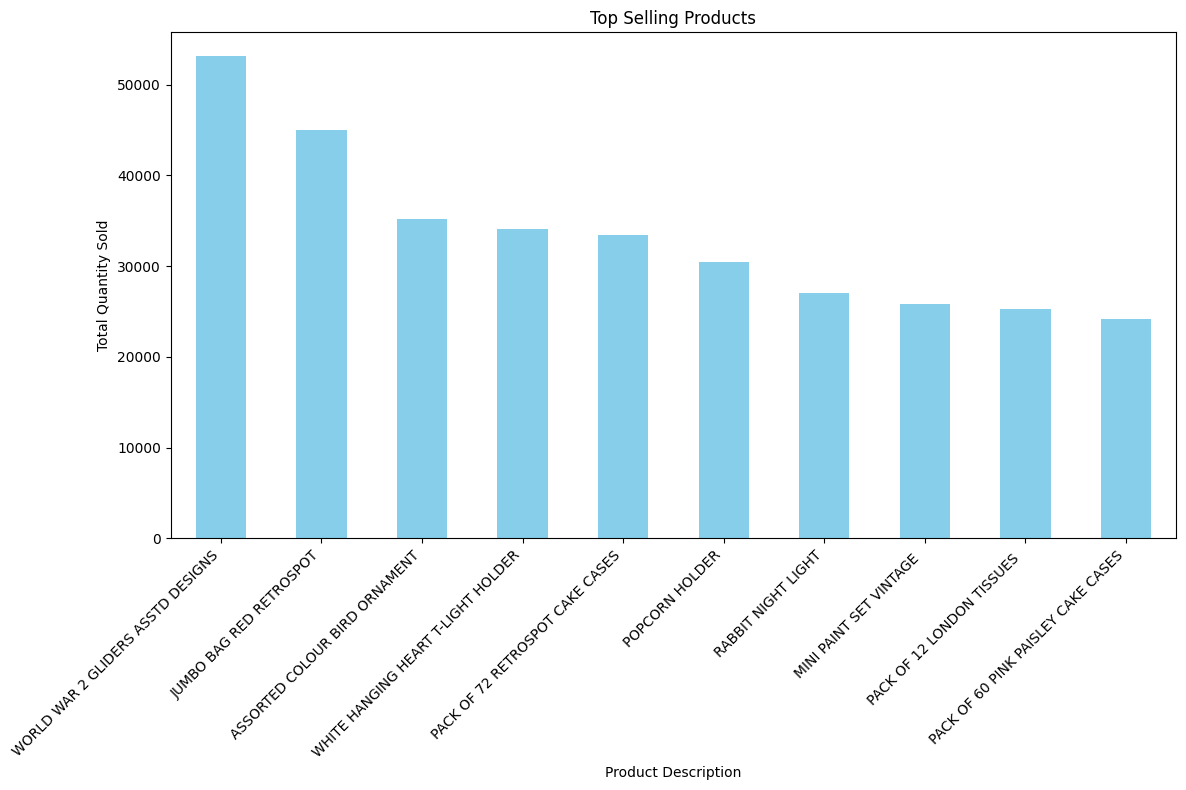

In [12]:
# Group by 'Description' and sum the 'Quantity' to find total sales of each product
top_selling_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot the top-selling products
plt.figure(figsize=(12, 8))
top_selling_products.plot(kind='bar', color='skyblue')
plt.title('Top Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Sales Trends Over Time:


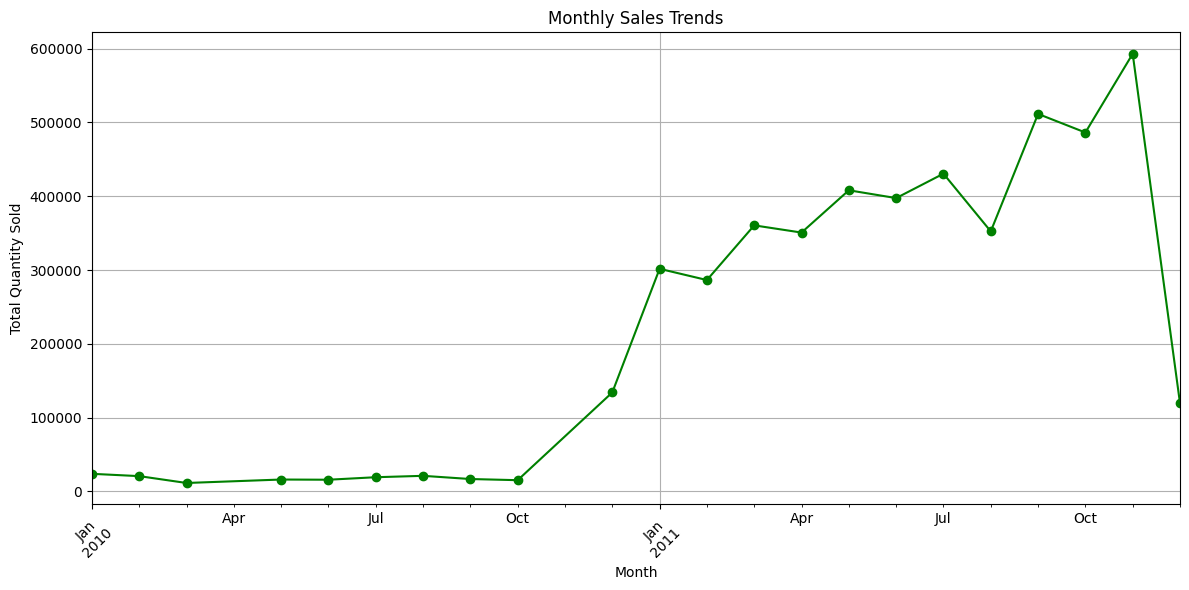

In [13]:
# Extract month and year from 'InvoiceDate'
data['Month'] = data['InvoiceDate'].dt.to_period('M')

# Group by 'Month' and sum the 'Quantity' to find total sales per month
monthly_sales = data.groupby('Month')['Quantity'].sum()

# Plot the sales trends over time
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o', color='green')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Customer Segmentation:

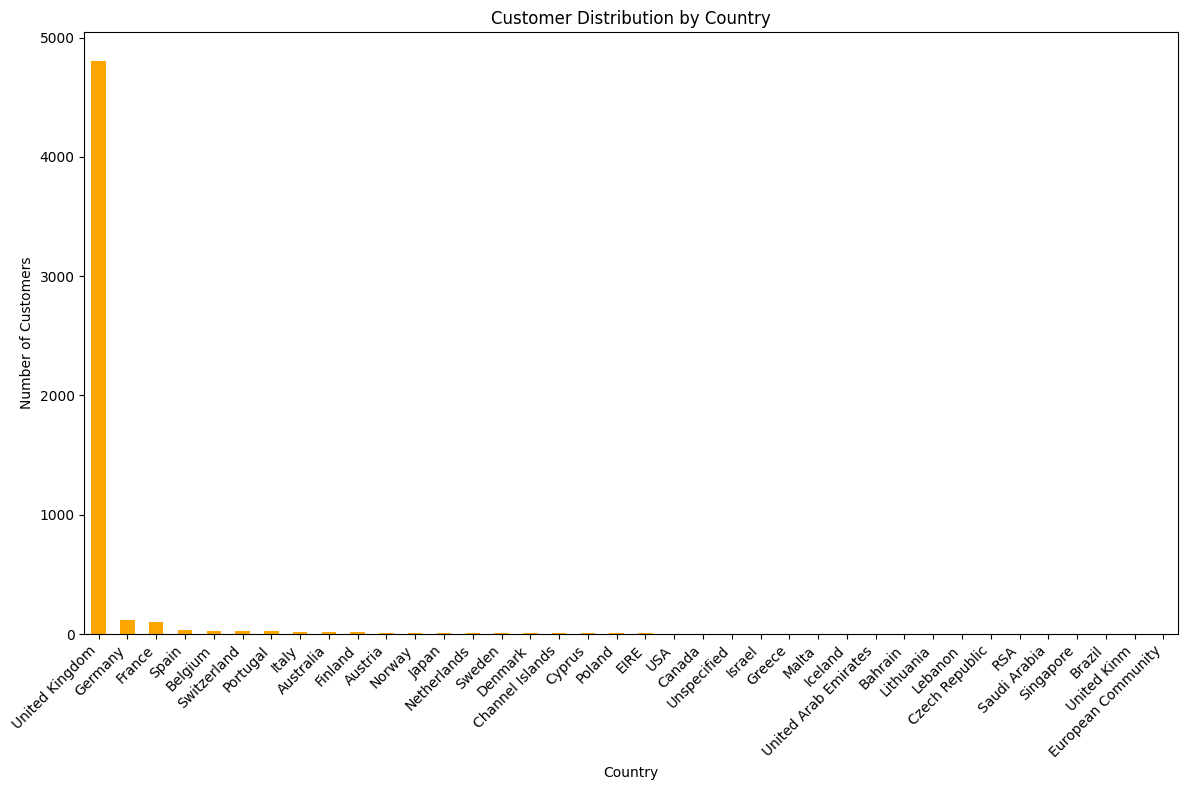

In [18]:
# Count the number of unique customers by country
customer_distribution = data.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False)

# Plot the customer distribution by country
plt.figure(figsize=(12, 8))
customer_distribution.plot(kind='bar', color='orange')
plt.title('Customer Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Geographic Analysis:

In [17]:
import plotly.express as px

# Group by 'Country' and sum the 'Quantity' to find total sales per country
sales_by_country = data.groupby('Country')['Quantity'].sum().reset_index()

# Create a choropleth map using Plotly Express
fig = px.choropleth(sales_by_country,
                    locations='Country',
                    locationmode='country names',
                    color='Quantity',
                    color_continuous_scale='Blues',
                    title='Geographic Distribution of Sales')
fig.update_layout(geo=dict(showframe=False,
                            showcoastlines=False,
                            projection_type='equirectangular'))
fig.show()
